In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("F:\\Assignment\\Data")
os.getcwd()

'F:\\Assignment\\Data'

In [3]:
data1 = pd.read_csv("Data.csv")
data = data1
data.describe()

,ProductID,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Weight,DaysToManufacture,ProductSubcategoryID,ProductModelID,ProductCategoryID,TotalUnitPrice,TotalUnitPriceDiscount
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,205.000000,504.000000,295.000000,295.000000,295.000000,2.660000e+02,266.00000
mean,673.039683,0.474206,0.585317,535.150794,401.363095,258.602961,438.666250,74.069220,1.103175,12.294915,37.444068,1.986441,2.121194e+05,1.28891
std,229.373142,0.499830,0.493157,374.112954,280.584715,461.632808,773.602843,182.166588,1.492616,9.860135,34.025442,0.918342,3.913986e+05,3.21191
min,1.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,2.120000,0.000000,1.000000,1.000000,1.000000,9.763200e+01,0.00000
25%,447.750000,0.000000,0.000000,100.000000,75.000000,0.000000,0.000000,2.880000,0.000000,2.000000,11.000000,1.000000,1.444097e+04,0.00000
50%,747.500000,0.000000,1.000000,500.000000,375.000000,23.372200,49.990000,17.900000,1.000000,12.000000,26.000000,2.000000,4.695572e+04,0.00000
75%,873.250000,1.000000,1.000000,1000.000000,750.000000,317.075825,564.990000,27.350000,1.000000,17.000000,48.500000,2.000000,1.914596e+05,0.25500
max,999.000000,1.000000,1.000000,1000.000000,750.000000,2171.294200,3578.270000,1050.000000,4.000000,37.000000,128.000000,4.000000,2.166146e+06,18.80000


In [4]:
data.head()

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,DaysToManufacture,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,ProductCategoryID,ProductCategory,TotalUnitPrice,TotalUnitPriceDiscount
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,316,Blade,BL-2036,1,0,NaN,800,600,0.0,0.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data.drop(labels=["Name","ProductID"],axis=1)

In [73]:
print data.MakeFlag.nunique()
print data.MakeFlag.value_counts()
print "265 products are purchased and 239 products are manufactured in-house"
print "______________________________________________"
print data.FinishedGoodsFlag.nunique()
print data.FinishedGoodsFlag.value_counts()
print "209 products are not salable and 295 are slable"
print "_______________________________________________"
print "Color and Number of products"
print data.Color.nunique()
print data.Color.value_counts()
print "_______________________________________________"
print "Minimum Inventory quantity"
print data.SafetyStockLevel.nunique()
print data.SafetyStockLevel.value_counts()
print "With this I can infer that popular products have high invetory over less popular"
print "________________________________________________"
print "Inventory level that triggers a purchase order or work order."
print data.ReorderPoint.nunique()
print data.ReorderPoint.value_counts()

print "-------------------------------"


2
0    265
1    239
Name: MakeFlag, dtype: int64
265 products are purchased and 239 products are manufactured in-house
______________________________________________
2
1    295
0    209
Name: FinishedGoodsFlag, dtype: int64
209 products are not salable and 295 are slable
_______________________________________________
Color and Number of products
9
Black           93
Silver          43
Red             38
Yellow          36
Blue            26
Multi            8
Silver/Black     7
White            4
Grey             1
Name: Color, dtype: int64
_______________________________________________
Minimum Inventory quantity
6
500     167
1000    156
100      97
4        54
800      25
60        5
Name: SafetyStockLevel, dtype: int64
With this I can infer that popular products have high invetory over less popular
________________________________________________
Inventory level that triggers a purchase order or work order.
6
375    167
750    156
75      97
3       54
600     25
45       5
Name: 

Most of the products where sold in the range of $0-$250


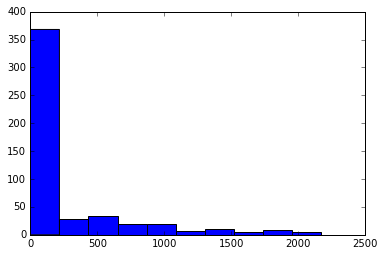

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data.StandardCost)
print "Most of the products where sold in the range of $0-$250"

In [9]:
print "profit = Standard cost of the product(StandardCost) - Selling price(ListPrice)"
data.Profit = data.StandardCost - data.ListPrice
print max(data.Profit)
print min(data.Profit)
print "*****  Products where sold at very low price than the standard cost *****"
print "May be as they are try to keep with the compitator, so they are selling a ceaper price"

profit = Standard cost of the product(StandardCost) - Selling price(ListPrice)
0.0
-1487.8356
*****  Products where sold at very low price than the standard cost *****
May be as they are try to keep with the compitator, so they are selling a ceaper price


(array([ 156.,    0.,    0.,    0.,  167.,    0.,    0.,   25.,    0.,  156.]),
 array([    4. ,   103.6,   203.2,   302.8,   402.4,   502. ,   601.6,
          701.2,   800.8,   900.4,  1000. ]),
 <a list of 10 Patch objects>)

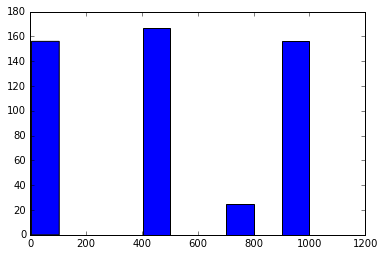

In [18]:
plt.hist(data.SafetyStockLevel)

In [90]:
print "All size products where sold"
print(data.Size.value_counts())
print data.SizeUnitMeasureCode.value_counts()
print "I assume all the sizes where measured in CM as a standard"
data.SizeUnitMeasureCode = "CM"
data.SizeUnitMeasureCode.value_counts()

All size products where sold
44    29
48    25
52    16
58    15
42    15
38    12
46    11
40    11
60    11
L     11
M     11
62    11
54     9
50     9
S      9
XL     3
56     2
70     1
Name: Size, dtype: int64
CM     328
CM     176
Name: SizeUnitMeasureCode, dtype: int64
I assume all the sizes where measured in CM as a standard


CM    504
Name: SizeUnitMeasureCode, dtype: int64

In [91]:
data.WeightUnitMeasureCode.value_counts()

LB     176
G       29
Name: WeightUnitMeasureCode, dtype: int64

In [93]:
data.Weight.describe()

count     205.000000
mean       74.069220
std       182.166588
min         2.120000
25%         2.880000
50%        17.900000
75%        27.350000
max      1050.000000
Name: Weight, dtype: float64

In [142]:
print "Some of the weight is measued in LB and some in grams" 
print " We have standardize the data, so lets make everything in grams"
data.Weight = np.where(data.WeightUnitMeasureCode == 'LB ', data.Weight * 453, data.Weight)

Some of the weight is measued in LB and some in grams
 We have standardize the data, so lets make everything in grams


Most of the products where manufactured in 1 day and they are assesories


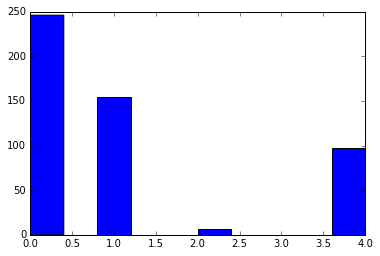

In [10]:
plt.hist(data.DaysToManufacture)
print "Most of the products where manufactured in 1 day and they are assesories"

In [135]:
print "Accessories are manufacture in 1 day, Bikes take maximum 4 days"
pd.crosstab(data.ProductCategory,data.DaysToManufacture)

Accessories are manufacture in 1 day, Bikes take maximum 4 days


DaysToManufacture,0,1,2,4
ProductCategory,,,,
Accessories,29,0,0,0
Bikes,0,0,0,97
Clothing,35,0,0,0
Components,0,127,7,0


In [138]:
print "R : Road,  M :Mountain,  T : Touring, S : Standard"
print "Most of the products are shipped using Road" 
data.ProductLine.value_counts()

R : Road,  M :Mountain,  T : Touring, S : Standard
Most of the products are shipped using Road


R     100
M      91
T      52
S      35
Name: ProductLine, dtype: int64

In [139]:
data.Class.value_counts()

L     97
H     82
M     68
Name: Class, dtype: int64

In [141]:
print "Mens products are very less compared to women as this also includes assesories"
print "Most of the products are universal"
data.Style.value_counts()

Mens products are very less compared to women as this also includes assesories


U     176
W      28
M       7
Name: Style, dtype: int64

In [13]:
print "Their are 37 product sub-categories"
len(data.ProductSubcategoryID.unique())

Their are 37 product sub-categories


38

I assume the product id where assigned systametically and product id's between 750-800 have high price


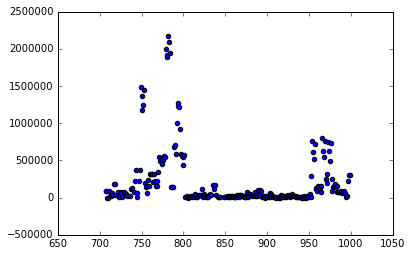

In [16]:
plt.scatter(data1.ProductID,data1.TotalUnitPrice)
print "I assume the product id where assigned systametically and product id's between 750-800 have high price"

In [158]:
a = data.TotalUnitPrice.max()
data1[data1.TotalUnitPrice == a]
print "ProductID = 782, ProductNumber = BK-M68B-38"
print "Product name:Mountain-200 Black, 38    is the costliest product in the list"

ProductID = 782, ProductNumber = BK-M68B-38
Product name:Mountain-200 Black, 38    is the costliest product in the list


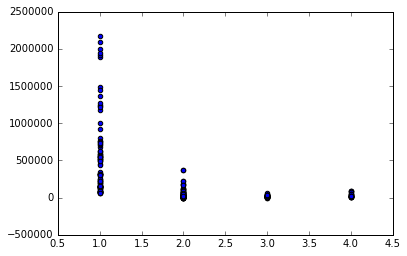

In [17]:
plt.scatter(data.ProductCategoryID,data.TotalUnitPrice)
print "Product category 1 are the most costly products."
#data[data.ProductCategoryID == 1]

In [164]:
a = data.TotalUnitPriceDiscount.max()
data1[data1.TotalUnitPriceDiscount == a]
print "ProductID: 762, ProductNumber: BK-R50R-44"
print "Product Name:  Road-650 Red, 44.   got the Maximum discount"

ProductID: 762, ProductNumber: BK-R50R-44
Product Name:  Road-650 Red, 44.   got the Maximum discount


In [170]:
df = data.dropna(axis=0, how='any') 

In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

C:\Users\kulka\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [207]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
# slice matrix so we only include the 0/1 indicator columns in the clustering
clusters = cluster.fit_predict(df)
df['cluster'] = clusters
df.cluster.value_counts()

C:\Users\kulka\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0    63
4    40
3    34
1    17
2     6
Name: cluster, dtype: int64

In [208]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(df,clusters)
print "Silhouette Score:"
ss

Silhouette Score:


0.78504295047510375

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline 

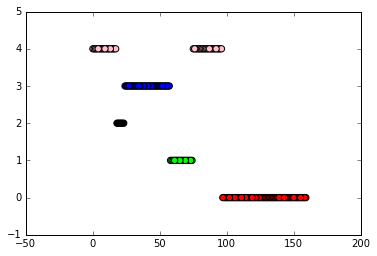

In [221]:
colormap = np.array(['red', 'lime', 'black','blue','pink'])
plt.scatter(df.ProductNumber,df.cluster,c=colormap[df.cluster], s=40)
plt.show()